## EDA 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5) # runtimeconfig size of graph W:h
plt.rcParams['figure.dpi'] = 300 # resolution of dots per inches
%matplotlib inline 
# after plotting graph many times depending on version of working lib like matplotlib
# graph will not be displayed output  screen below for that we have to write everytime plt.show()
# so if you  write '%matplotlib inline' we don't need to write show() method.
import warnings # any warning regarding updates in functions. to ignore it write this line.
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("C:\\Users\\Vishnu\\Desktop\\RESTART\\csv\\data_clean1.csv")
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
df.describe()
# shows the statistical description  of numerical columns
# null values from count


,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [7]:
df.describe(include = object)

,Month,Weather
count,158,155
unique,6,3
top,9,S
freq,34,59


In [8]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Month    158 non-null    object 
 4   Day      158 non-null    int64  
 5   Year     158 non-null    int64  
 6   Temp     158 non-null    int64  
 7   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 10.0+ KB


In [10]:
# data type conversion

In [11]:
df['Month']

0      5
1      5
2      5
3      5
4      5
      ..
153    5
154    9
155    9
156    9
157    9
Name: Month, Length: 158, dtype: object

In [12]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [13]:
df["Month"].value_counts()

Month
9      34
5      31
7      31
8      31
6      30
May     1
Name: count, dtype: int64

In [14]:
df['Month'].replace('May','5', inplace = True) # replacing only vLUE NOT THE DATATYOE

In [15]:
df['Month'].unique()

array(['5', '6', '7', '8', '9'], dtype=object)

In [16]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [17]:
df['Month'].astype(int) # no permanant change

0      5
1      5
2      5
3      5
4      5
      ..
153    5
154    9
155    9
156    9
157    9
Name: Month, Length: 158, dtype: int32

In [111]:
df['Month'] = df['Month'].astype(int)

In [113]:
df.dtypes

Ozone          float64
Solar          float64
Wind           float64
Month            int32
Day              int64
Temperature      int64
Weather         object
dtype: object

In [20]:
df["Weather"].unique()

array(['S', 'C', 'PS', nan], dtype=object)

# Duplicates

In [22]:
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [23]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156     True
157    False
Length: 158, dtype: bool

In [24]:
df.duplicated().sum() # sum of only true value.

1

In [25]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,9,28,2010,75,S


In [26]:
df[df.duplicated(keep = False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
150,14.0,191.0,14.3,9,28,2010,75,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [27]:
# Drop duplicate record

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.shape

(157, 8)

In [30]:
df.duplicated().sum()

0

# drop column

In [32]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S


In [109]:
df.tail()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S
157,18.0,131.0,8.0,9,29,76,C


In [34]:
df['Year'].value_counts()

Year
2010    157
Name: count, dtype: int64

In [35]:
df.drop(columns=['Year'], inplace = True) # implace means permnantly deleted

In [36]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [37]:
df.drop(columns = ['Ozone','Month'])

,Solar.R,Wind,Day,Temp,Weather
0,190.0,7.4,1,67,S
1,118.0,8.0,2,72,C
2,149.0,12.6,3,74,PS
3,313.0,11.5,4,62,S
4,NaN,14.3,5,56,S
...,...,...,...,...,...
152,223.0,11.5,30,68,S
153,190.0,7.4,1,67,C
154,193.0,6.9,26,70,PS
155,145.0,13.2,27,77,S


In [38]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [39]:
df.drop(index=[1]) # to drop record or row
# Temporary changes

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
5,28.0,NaN,14.9,5,6,66,C
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


In [40]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [41]:
df.drop(index = [1,3])

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
2,12.0,149.0,12.6,5,3,74,PS
4,NaN,NaN,14.3,5,5,56,S
5,28.0,NaN,14.9,5,6,66,C
6,23.0,299.0,8.6,5,7,65,PS
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


# rename the column

In [43]:
df.head()

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [44]:
df.rename(columns ={'Solar.R' : 'Solar', 'Temp' : 'Temperature'}, inplace = True)

In [45]:
df

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9,30,68,S
153,41.0,190.0,7.4,5,1,67,C
154,30.0,193.0,6.9,9,26,70,PS
155,NaN,145.0,13.2,9,27,77,S


# missing value imputation

- Reasons of missing values:
    - Data entry errors.
    - issues with machines.
    - improper data handling, etc.

- Treatment :
    - 0 to 5% missing value in a column : drop rows
    - 6 to 45% missing values in a column: replace the missing values.
    -  50% missing values in a column: drop column.
      

# Outliers Detection

- Histpogram
- boxplot
- descriptive statiscs

In [48]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S


In [49]:
df.isna()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...
152,False,False,False,False,False,False,False
153,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False
155,True,False,False,False,False,False,False


In [50]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [51]:
df.isnull().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [52]:
sns.heatmap(df.isna())

<Axes: >

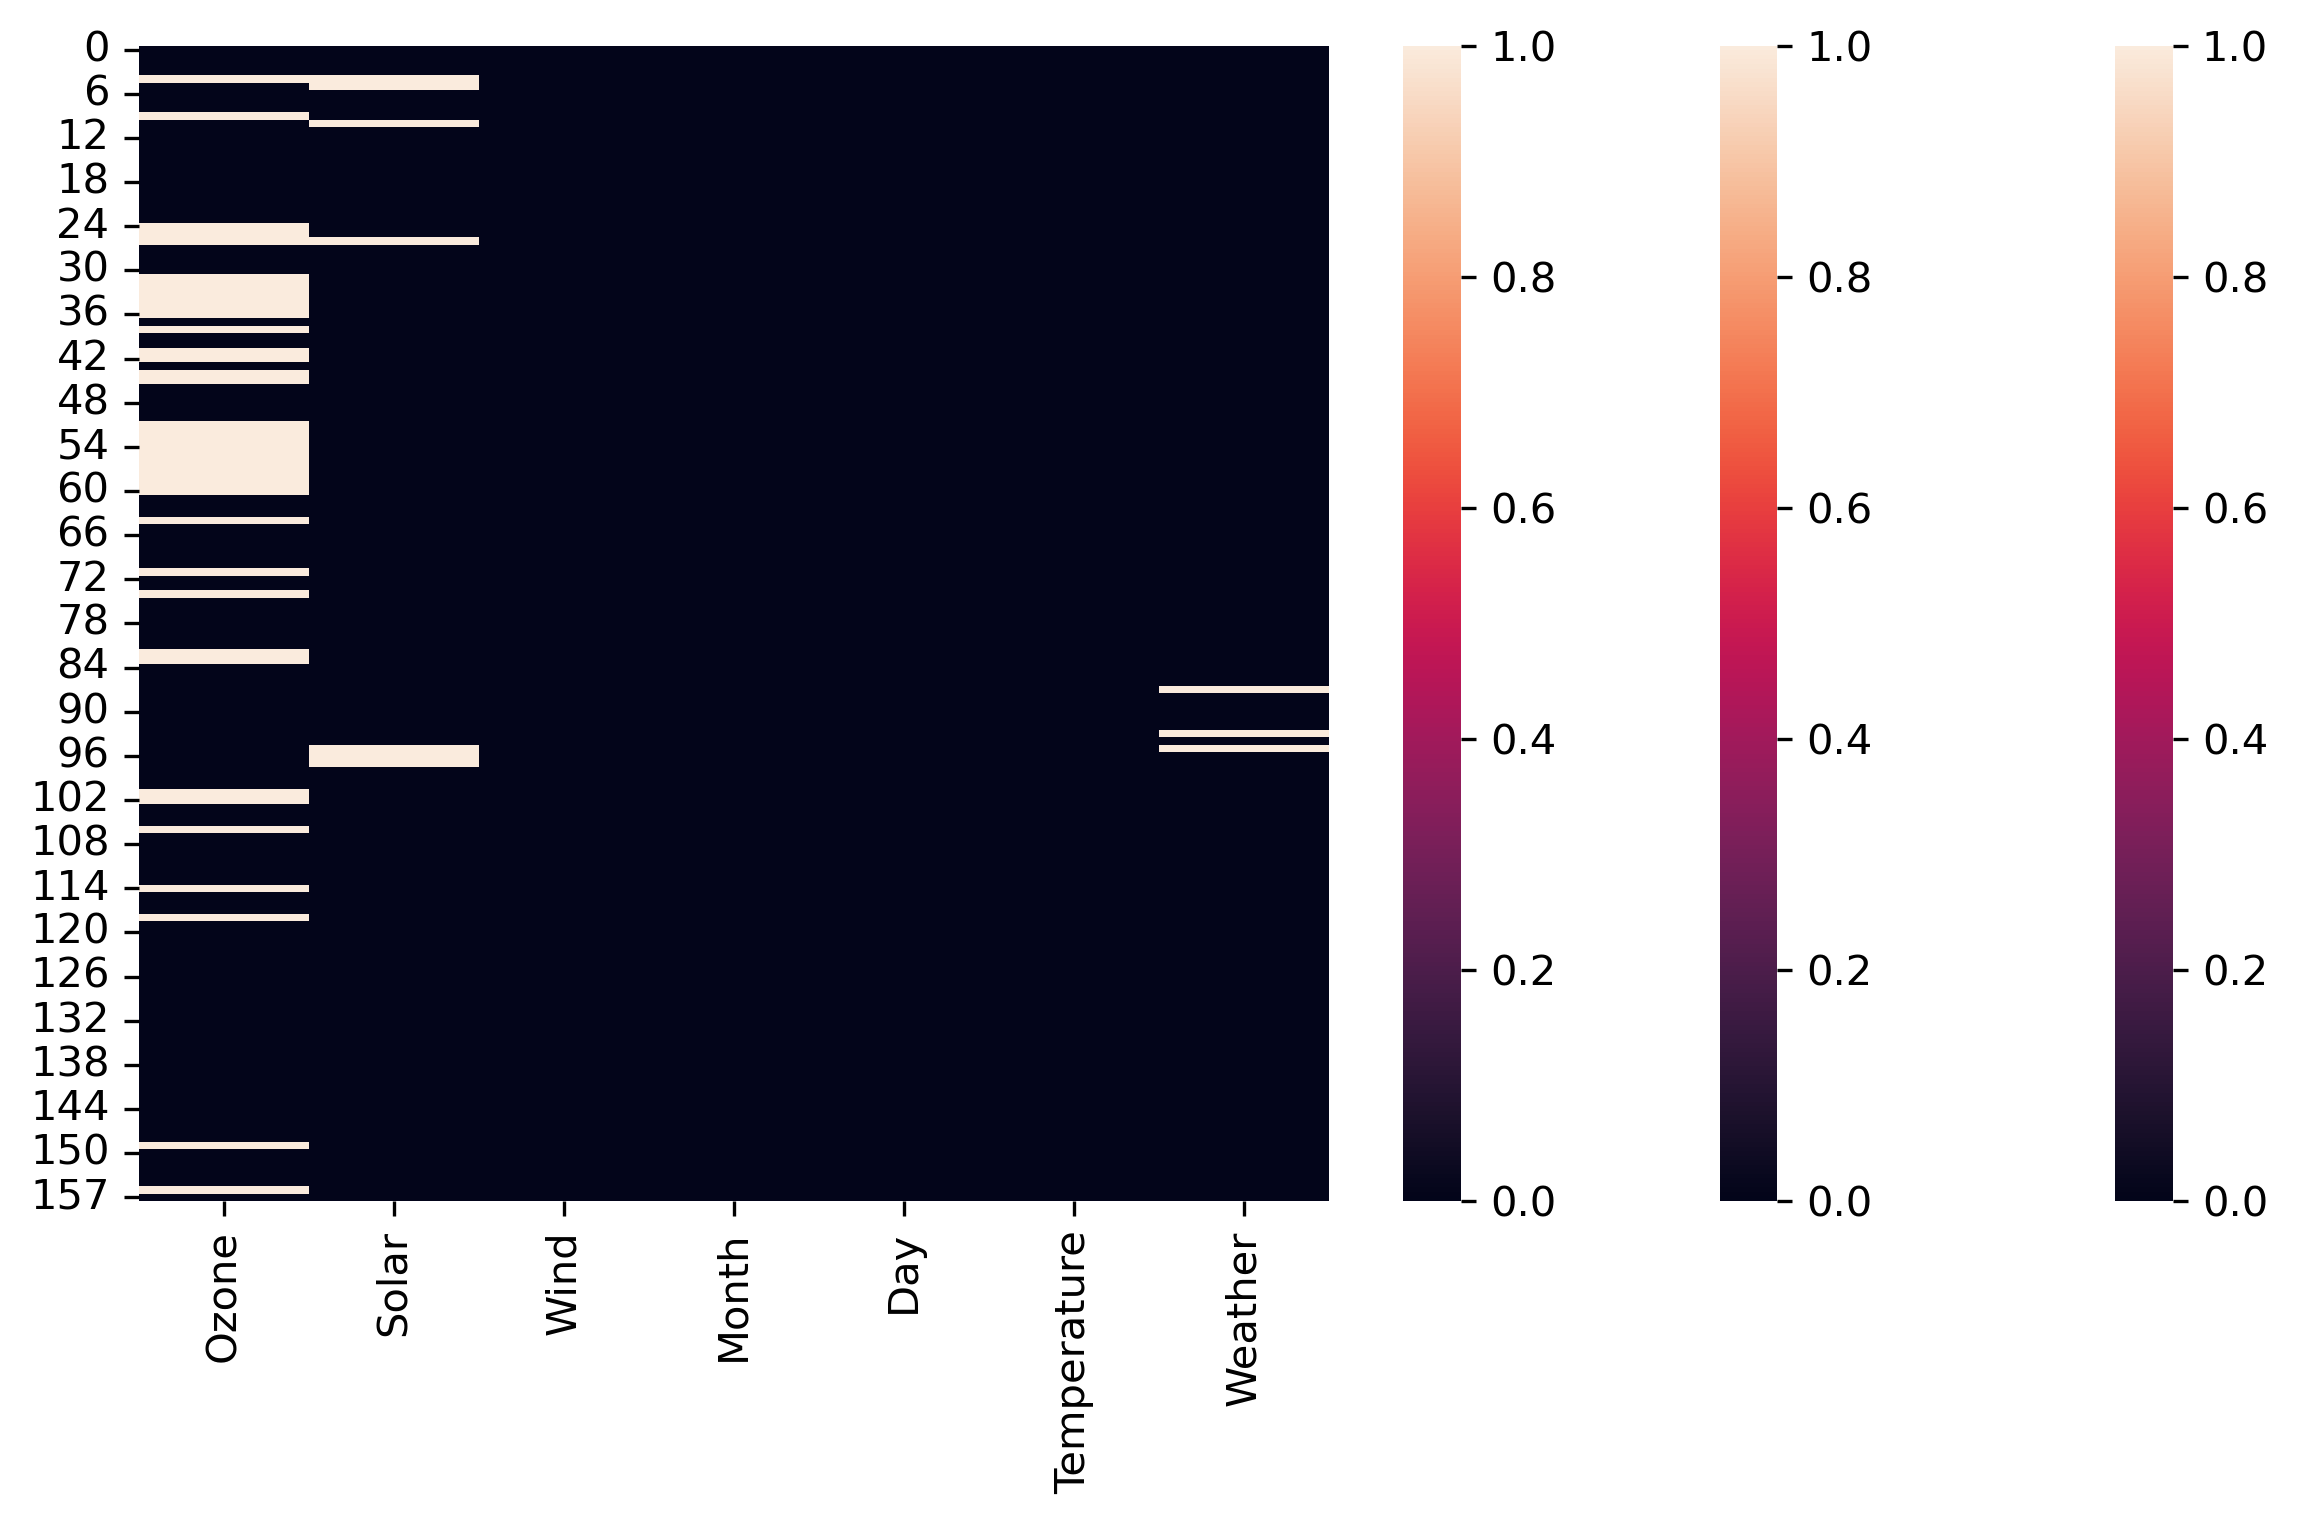

In [99]:
sns.heatmap(df.isnull())
plt.show()

In [101]:
df.isna().sum()

Ozone          38
Solar           7
Wind            0
Month           0
Day             0
Temperature     0
Weather         3
dtype: int64

In [103]:
len(df)

157

In [105]:
for i in df.isna().sum():
    print((i/len(df))*100)

24.203821656050955
4.45859872611465
0.0
0.0
0.0
0.0
1.910828025477707


In [107]:
df.head()

,Ozone,Solar,Wind,Month,Day,Temperature,Weather
0,41.0,190.0,7.4,5,1,67,S
1,36.0,118.0,8.0,5,2,72,C
2,12.0,149.0,12.6,5,3,74,PS
3,18.0,313.0,11.5,5,4,62,S
4,NaN,NaN,14.3,5,5,56,S
